In [ ]:
import json
file_path = "orientation_type_num_dic.json"
with open(file_path, "r") as json_file:
    data = json.load(json_file)
data

In [ ]:
data1 = [item[0] for item in data]
data2 = [item[1] for item in data]

In [ ]:
import pandas as pd

# 定义行和列的标签
columns = ['group', '-1', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
rows = list(range(1, 19))

# 初始化数据，默认值为0
data = [[0]*13 for _ in range(18)]

# 将数据和标签创建为DataFrame
df = pd.DataFrame(data, columns=columns)
df['group'] = rows

i = 0
for item in data1:
    for key in item.keys():
        df.at[i, key] = item[key]
    i += 1

df = df.drop(columns = ['0', '5', '8', '9'])
df

In [ ]:
df.to_csv("df1.csv", index=False)

In [ ]:
import pandas as pd

# 定义行和列的标签
columns = ['group', '-1', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
rows = list(range(1, 19))

# 初始化数据，默认值为0
data = [[0]*13 for _ in range(18)]

# 将数据和标签创建为DataFrame
df2 = pd.DataFrame(data, columns=columns)
df2['group'] = rows

i = 0
for item in data2:
    for key in item.keys():
        df2.at[i, key] = item[key]
    i += 1

df2 = df2.drop(columns = ['0', '5', '8', '9'])
df2

In [ ]:
df2.to_csv("df2.csv", index=False)

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import json

# Load data from radar.json
with open('radar.json') as f:
    data = json.load(f)

# Convert JSON data to a Pandas DataFrame
df = pd.DataFrame(data)

# Extract features for clustering (excluding "index" and "car_id")
features = df.drop(["index", "car_id"], axis=1)

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Set the number of clusters (you can adjust this based on your requirements)
n_clusters = 3

# Apply KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(features_scaled)

# Display the result
# print(df[['index', 'car_id', 'cluster']])


          car_id  cluster         x         y
0         181049        0 -1.148420 -0.251011
1         181053        0 -1.505088 -0.343524
2         181077        0 -1.270957 -0.282795
3         181092        0 -1.364775 -0.307129
4         181109        0 -1.334334 -0.299234
...          ...      ...       ...       ...
43267  212357528        0 -0.973286  0.384306
43268  212357700        0 -0.844294 -0.172127
43269  212357713        0 -1.155845  1.143999
43270  212358464        0 -1.516204 -0.346407
43271  212359557        0 -0.531191  0.495015

[43272 rows x 4 columns]


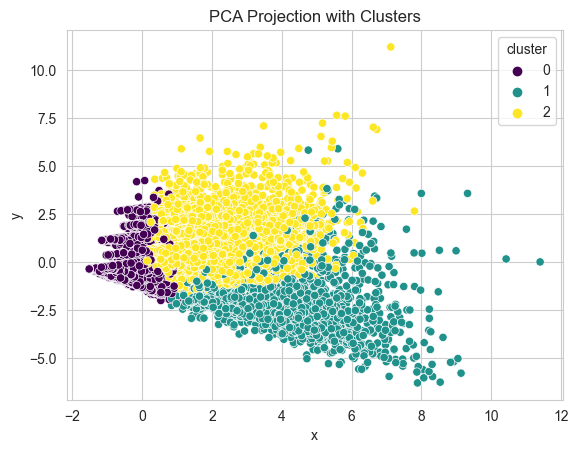

In [2]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
projection = pca.fit_transform(features_scaled)
df['x'] = projection[:, 0]
df['y'] = projection[:, 1]

# Display the result
result_df = df[['car_id', 'cluster', 'x', 'y']]
print(result_df)

sns.scatterplot(x='x', y='y', hue='cluster', data=result_df, palette='viridis')
plt.title('PCA Projection with Clusters')
plt.show()

In [3]:
df[['car_id', 'cluster']].to_json('cluster_all.json', orient='records', lines=False)

In [3]:
# 根据 cluster 进行分组，并对每个组进行采样
sampled_df = df.groupby('cluster', as_index=False).apply(lambda x: x.sample(frac=0.01, random_state=42))
remaining_counts = sampled_df.groupby('cluster', as_index=False).size()
# 打印结果
# print(sampled_df)
# print(df.groupby('cluster', as_index=False).size())
# print(remaining_counts)

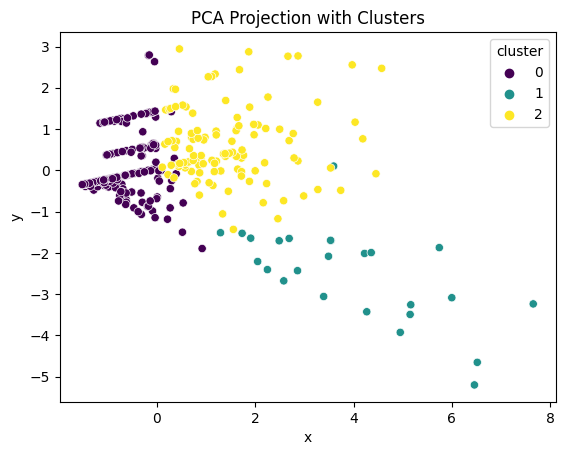

In [4]:
sns.scatterplot(x='x', y='y', hue='cluster', data=sampled_df, palette='viridis')
plt.title('PCA Projection with Clusters')
plt.show()

In [5]:
sampled_df

index     car_id  lane_change  high_acc_count  low_acc_count  \
0 31318  31318  208472687            0             0.0            0.0   
  40651  40651  211523529            5             0.0            0.0   
  11945  11945   58061686            0             0.0            1.0   
  5423    5423     971250            0             0.0            0.0   
  13635  13635   88551279            0             1.0            0.0   
...        ...        ...          ...             ...            ...   
2 3273    3273     219644            0             0.0            1.0   
  42036  42036  211941527            4             0.0            1.0   
  29612  29612  207849503            0             1.0            1.0   
  18175  18175  203773014            0             0.0            0.0   
  41106  41106  211686364            0             0.0            0.0   

           max_vel   mean_vel  turning_speed  cluster         x         y  
0 31318   0.000000   0.000000            0.0        0 -1.516204 -0.346407  
  40651   1.671342   1.319923            0.0        0 -0.750634 -0.463236  
  11945   0.730569   0.730569            0.0        0 -0.805258  0.427889  
  5423    0.160887   0.160887            0.0        0 -1.467419 -0.333753  
  13635   3.696643   2.629695            0.0        0 -0.215937  1.369035  
...            ...        ...            ...      ...       ...       ...  
2 3273    4.137711   4.137711            0.0        2  0.227868  0.695862  
  42036   5.939324   3.784241            0.0        2  0.663279  0.523530  
  29612  11.859673  11.514108            0.0        2  2.871087  2.772322  
  18175   6.553142   6.521821            0.0        2  0.465551  0.167071  
  41106   5.964549   5.964549            0.0        2  0.292389  0.122707  

[433 rows x 11 columns]

In [7]:
# Assuming sampled_df is the DataFrame you want to save
# Columns include car_id, x, y, cluster

# Save sampled_df to a JSON file
sampled_df[['car_id', 'x', 'y', 'cluster']].to_json('sampled_data.json', orient='records', lines=False)
